In [11]:
from region_growth import region_growing

import sys
sys.path.append('C:/Users/nicol/OneDrive/Área de Trabalho/Processamento-Digital-de-Imagem/Work-2')
from MathMorphology.Dilation.dilation import dilation
from MathMorphology.Erosion.erosion import erosion

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [12]:
def structure_element (size, type):
    if type == 1:
        # square
        kernel = np.ones(size, np.uint8)
        return kernel
    if type == 2:
        # star
        kernel = np.ones(size, np.uint8)
        center = np.uint8((size[0]/2))
        for k in range(0,size[0]):
            kernel[center,k] = 0
            kernel[k,center] = 0
        return kernel
    if type == 3:
        # something 01
        kernel = np.ones(size, np.uint8)
        center = np.uint8((size[0]/2))
        kernel[:,0] = 0
        kernel[center,1] = 0
        return kernel

In [13]:
img = cv2.imread('../../assets/basketball-nba.png', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


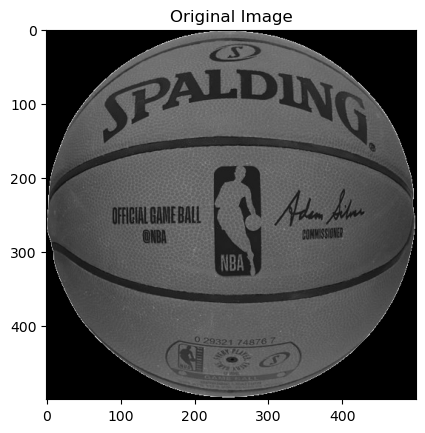

In [14]:
plt.figure(1)
plt.imshow(img_gray, "gray")
plt.title("Original Image")
plt.show()

In [35]:
seed = (80, 225)
threshold = 50
print(img_gray.shape)

binary_region_orig = region_growing(img_gray, seed, threshold)

(500, 500)


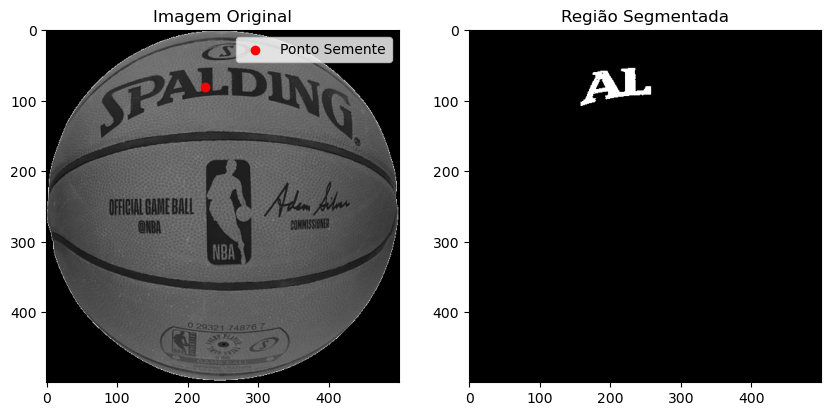

In [36]:
# Mostra a imagem original e a região segmentada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.scatter(seed[1], seed[0], color='red', marker='o', label='Ponto Semente')
plt.title('Imagem Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.imshow(binary_region_orig, cmap='gray')
plt.title('Região Segmentada')
plt.show()

In [61]:
size = np.array([1, 10])
EE = structure_element(size, 1)

img_erosion = erosion(img_gray, EE , 1)


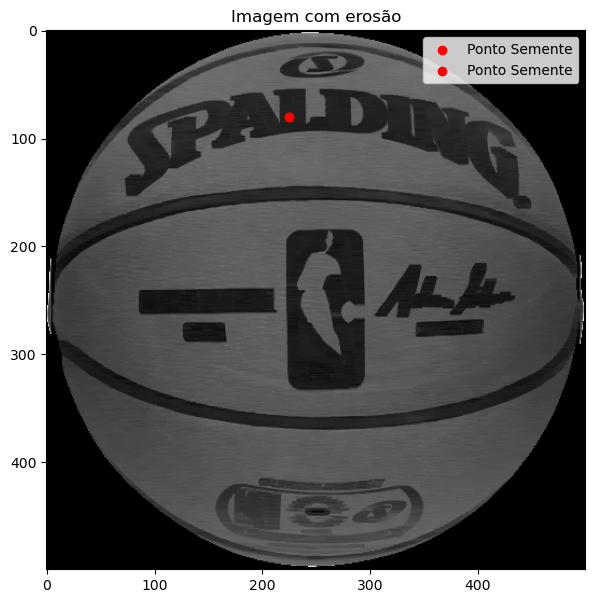

In [62]:
plt.figure(figsize=(15, 7))

plt.imshow(img_erosion, cmap='gray')
plt.scatter(seed[1], seed[0], color='red', marker='o', label='Ponto Semente')
plt.title('Imagem com erosão')
plt.legend()

plt.imshow(EE, cmap='gray')
plt.scatter(seed[1], seed[0], color='red', marker='o', label='Ponto Semente')
plt.title('Imagem com erosão')
plt.legend()


In [67]:
seed = (80, 225)
threshold = 70
print(img_gray.shape)

binary_region_ero = region_growing(img_erosion, seed, threshold)

(500, 500)


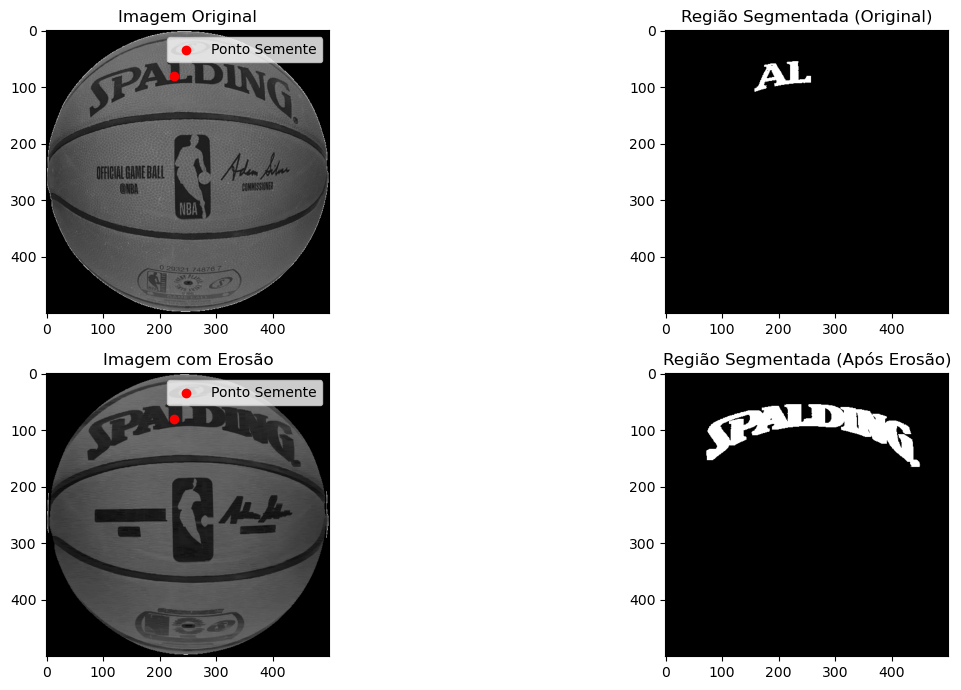

In [68]:
# Mostra a imagem original e a região segmentada
plt.figure(figsize=(15, 7))

# Primeiro par de subplot (imagem original e região segmentada original)
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.scatter(seed[1], seed[0], color='red', marker='o', label='Ponto Semente')
plt.title('Imagem Original')
plt.legend()

plt.subplot(2, 2, 2)
plt.imshow(binary_region_orig, cmap='gray')
plt.title('Região Segmentada (Original)')

plt.subplot(2, 2, 3)
plt.imshow(img_erosion, cmap='gray')
plt.scatter(seed[1], seed[0], color='red', marker='o', label='Ponto Semente')
plt.title('Imagem com Erosão')
plt.legend()

plt.subplot(2, 2, 4)
plt.imshow(binary_region_ero, cmap='gray')
plt.title('Região Segmentada (Após Erosão)')

plt.tight_layout()
plt.show()

In [98]:
size = np.array([3, 3])
EE = structure_element(size, 1)
segmented_erosion= erosion(binary_region_ero, EE, 2)

Text(0.5, 1.0, 'Região Segmentada com erosão')

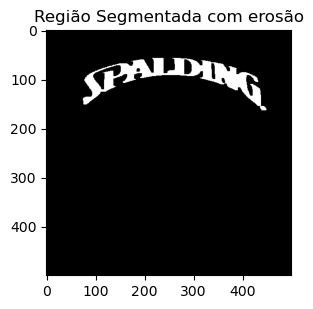

In [99]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 2)
plt.imshow(segmented_erosion, cmap='gray')
plt.title('Região Segmentada com erosão')